<a href="https://colab.research.google.com/github/RongRpng/data_analysis_and_deep_learning/blob/master/WorldBank2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 世界银行国际旅游业指标分析

世界银行是一个致力于全球可持续性发展和减少极端贫困的全球性合作组织，提供各种金融产品，公开数据和学术援助。这次项目首先从世界银行的页面通过给定的api爬取了各个国家国际旅游收入（现价美元），国际旅游支出（现价美元），国际旅游离境人数，国际旅游入境人数，国际旅游收入（占总出口的百分比），国际旅游支出（占总进口的百分比）这6项指标从1995年到2017年的数据，之后进行了数据的预处理，分析，最后尝试利用ARIMA模型对中国的国际旅游离境人数做了初步预测。项目结构如下：


*   数据获取
*   数据清洗
*   数据分析
  - 近期数据分析 (2017）
      1.   各国旅游业年净收入对比 (Net Income)
      2.   离境人口消费力和入境人口消费力国家排行
      3.   旅游收入（占总出口的百分比）和旅游支出（占总进口的百分比）国家排行
  - 长期数据分析 (1995-2017)
      1.   中、美、西班牙历年指数变化
      2.   中国历年指数的历年增长率变化
*   数据预测
  - Arima




# 数据获取

从World Bank的Api上抓取不同指标的多页数据并按照指标名称整合成多个csv表。获取的指标和官方解释如下：
> 国际旅游收入： 指国际入境游客的支出，包括支付给本国承运人的国际运输费用。

>国际旅游支出：指国际出境游客在其他国家的支出，包括支付给外国运输公司的国际运输费用。

> 国际出境游客：指从惯常居住国去往任何其他国家、其目的不是在所访问的国家从事获取报酬的活动的游客数量。

> 国际入境游客：指到一个非惯常居住国旅行、脱离其惯常环境、旅行时间不超过 12 个月、旅行的主要目的不是在所访问的国家从事获取报酬的活动的游客数量。

In [0]:
import os
if not os.path.exists('./drive/My Drive/dataset'):
    os.mkdir('./drive/My Drive/dataset')

In [0]:
import requests
import pandas as pd
import json

# 用于爬取的不同指标的代号
indicators = {'ST.INT.RCPT.XP.ZS':'国际旅游收入（占总出口的百分比）',
              'ST.INT.TVLR.CD':'国际旅游收入（现价美元）', 
              'ST.INT.DPRT':'国际旅游离境人数',
              'ST.INT.ARVL':'国际旅游入境人数',
              'ST.INT.XPND.CD':'国际旅游支出（现价美元）',
              'ST.INT.XPND.MP.ZS':'国际旅游支出（占总进口的百分比）'}

for i in indicators.keys():
  # max_page初始设置成3，爬取到页面后更新max_page
  page, max_page = 1, 3
  # 为每个指标建立一个新的dataframe
  df_country = pd.DataFrame()

  while page <= max_page:
    try:
      url = f'https://api.worldbank.org/v2/country/indicator/{i}?format=json&page={page}'
      s = requests.Session()
      r = s.get(url)
      
      if r.status_code==200:
        # 从xml页面上的参数得到更新后的max_page和数据
        max_page = r.json()[0]['pages']
        data = r.json()[1]
        print(f'Fetching {indicators[i]} page {page}....')
        
        # 把json的层级化结构打平
        df = pd.io.json.json_normalize(data, max_level=1)
        df_country = pd.concat([df_country, df])
        page += 1
    except requests.exceptions.Timeout:
      print('Time out: ', url)
      break

  filename = f'./drive/My Drive/dataset/{indicators[i]}.csv'
  df_country.to_csv(filename, index=None, encoding='utf-8')

Fetching 国际旅游收入（占总出口的百分比） page 1....
Fetching 国际旅游收入（占总出口的百分比） page 2....
Fetching 国际旅游收入（占总出口的百分比） page 3....
Fetching 国际旅游收入（占总出口的百分比） page 4....
Fetching 国际旅游收入（占总出口的百分比） page 5....
Fetching 国际旅游收入（占总出口的百分比） page 6....
Fetching 国际旅游收入（占总出口的百分比） page 7....
Fetching 国际旅游收入（占总出口的百分比） page 8....
Fetching 国际旅游收入（占总出口的百分比） page 9....
Fetching 国际旅游收入（占总出口的百分比） page 10....
Fetching 国际旅游收入（占总出口的百分比） page 11....
Fetching 国际旅游收入（占总出口的百分比） page 12....
Fetching 国际旅游收入（占总出口的百分比） page 13....
Fetching 国际旅游收入（占总出口的百分比） page 14....
Fetching 国际旅游收入（占总出口的百分比） page 15....
Fetching 国际旅游收入（占总出口的百分比） page 16....
Fetching 国际旅游收入（占总出口的百分比） page 17....
Fetching 国际旅游收入（占总出口的百分比） page 18....
Fetching 国际旅游收入（占总出口的百分比） page 19....
Fetching 国际旅游收入（占总出口的百分比） page 20....
Fetching 国际旅游收入（占总出口的百分比） page 21....
Fetching 国际旅游收入（占总出口的百分比） page 22....
Fetching 国际旅游收入（占总出口的百分比） page 23....
Fetching 国际旅游收入（占总出口的百分比） page 24....
Fetching 国际旅游收入（占总出口的百分比） page 25....
Fetching 国际旅游收入（占总出口的百分比） page 26....
Fetching 国际旅游收入（占总出口的

# 数据清洗

由于世界银行的数据只提供到2017年为止，2018年的数据为空，同时1995年之前的数据也缺失，所以采用直接删除缺失值的办法删除掉缺失的年份，在之后的数据分析中也将只研究最近的2017年的数据。

In [0]:
import pandas as pd
import os
path = "./drive/My Drive/clean_dateset"
if not os.path.exists(path):
    os.mkdir(path)

利用下载好的国家代码对照表，提取各国的国家代码和过滤出所有原始数据国家列表里面的非国家的名称，这些非国家的income_group的值为空。

In [0]:
import numpy as np

raw_path = "./drive/My Drive/dataset"
df_income_group = pd.read_csv(f'{raw_path}/country_en.csv', index_col='Country Name')
# 创建国家代码dataframe列表
country_code = df_income_group[['Country Code']]
# 创建非国家组织的dataframe列表
orga = df_income_group.loc[df_income_group.IncomeGroup.isnull()]
orga.index

Index(['Arab World', 'Central Europe and the Baltics',
       'Caribbean small states', 'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income', 'Middle East & North Africa (excluding high income)',
       'North America', 'OECD members', 'Other small states',
       'Pre-demographic dividend', 'Pacific island small states',
   

从爬取的原始数据文件夹dataset里面取出csv进行数据清洗，原始数据如下面一行代码所示，用group_by根据国家名称进行分组，将数据变成国家名称为行数，时间为列数。处理后的dataframe为最后一行代码所示。

In [0]:
# 原始csv数据展示
df_country.head()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,ARB,2019,NaN,,,1,ST.INT.XPND.MP.ZS,"International tourism, expenditures (% of tota...",1A,Arab World
1,ARB,2018,NaN,,,1,ST.INT.XPND.MP.ZS,"International tourism, expenditures (% of tota...",1A,Arab World
2,ARB,2017,9.75262,,,1,ST.INT.XPND.MP.ZS,"International tourism, expenditures (% of tota...",1A,Arab World
3,ARB,2016,10.0388,,,1,ST.INT.XPND.MP.ZS,"International tourism, expenditures (% of tota...",1A,Arab World
4,ARB,2015,8.93582,,,1,ST.INT.XPND.MP.ZS,"International tourism, expenditures (% of tota...",1A,Arab World


In [0]:
import pandas as pd
df_in_m = pd.read_csv(f'{raw_path}/国际旅游收入（现价美元）.csv', index_col='country.value')
df_out_m = pd.read_csv(f'{raw_path}/国际旅游支出（现价美元）.csv', index_col='country.value')

df_in_ppl = pd.read_csv(f'{raw_path}/国际旅游入境人数.csv', index_col='country.value')
df_out_ppl = pd.read_csv(f'{raw_path}/国际旅游离境人数.csv', index_col='country.value')

df_in_percent = pd.read_csv(f'{raw_path}/国际旅游收入（占总出口的百分比）.csv', index_col='country.value')
df_out_percent = pd.read_csv(f'{raw_path}/国际旅游支出（占总进口的百分比）.csv', index_col='country.value')

df_dict = {'国际旅游收入': df_in_m, '国际旅游支出': df_out_m, 
           '国际旅游入境人数':df_in_ppl, '国际旅游离境人数':df_out_ppl,
           '国际旅游收入(百分比)': df_in_percent, '国际旅游支出(百分比)': df_out_percent}

for key in list(df_dict.keys()):
  df = pd.DataFrame(df_dict[key][['date', 'value']])
  df_final = pd.DataFrame()
  # 每一组是一个国家，k是国家名，v为数据
  for k, v in df.groupby('country.value', as_index=False, sort=False):
    v.set_index('date', inplace=True)
    v.columns = [k]
    df_final = pd.concat([df_final, v], axis=1)
  #转置使原本为列的时间轴变为行
  df_dict[key] = df_final.transpose()
  # 移除1960到1994年和2018到2019年的空数据
  df_dict[key] = df_dict[key].drop(columns=[int(col) for col in range(1960, 1995)])
  df_dict[key] = df_dict[key].drop(columns=[int(col) for col in range(2018, 2020)])

  #清洗后的数据存入文件夹clean_dataset备用
  filename = f'{path}/{key}.csv'
  df_dict[key].to_csv(filename, encoding='utf-8')

# 数据分析


## 短期

### 各国旅游业年净收入对比 (Net Income)

我们可以通过各国的国际旅游收入和国际旅游支出计算出该过的净收入。计算公式为：净收入 = 本国国际旅游收入-本国国际旅游支出。以下为2017年各国的国际旅游业的净收入可视化对比图。

通过计算和降序排序我们可以发现，西班牙是2017年全球旅游业净收入最高的国家，泰国和美国分别为第二和第三名。

In [0]:
year = 2017
# 计算净收入
df_net = df_dict['国际旅游收入'][year] - df_dict['国际旅游支出'][year]
# 排除其中的非国家
df_net = df_net.loc[[i for i in df_net.index if i not in orga.index]]
df_net = df_net.sort_values(ascending=False)

# 加入国家代码方便画图
df_net = pd.DataFrame(df_net).join(country_code, how='left')
df_net.head()

,2017,Country Code
Spain,4.611600e+10,ESP
Thailand,4.589800e+10,THA
United States,3.682900e+10,USA
"Macao SAR, China",3.448200e+10,MAC
Turkey,1.729700e+10,TUR


接下来画出各国2017年旅游业带来的外汇收入对比图，颜色越深的国家净收入越少。很明显中国2017年向外通过旅游业输送外汇超过两千亿美元。同时2017年缺失收入值或支出值的国家在地图上显示为灰色。地图可以拖动，放大后可以找到颜色最浅的西班牙。

In [0]:
import plotly.graph_objects as go
import pandas as pd

df = df_net

fig = go.Figure(data=go.Choropleth(
    locations = df['Country Code'],
    z = df[year],
    text = df.index,
    colorscale = 'mint',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.1,
    colorbar_tickprefix = '$',
    colorbar_title = 'Tourism Net Value<br>Billion US$',
    colorbar_x = -0.05
))

fig.update_layout(
    title_text='2017 International tourism net receipts',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.8,
        y=0.1,
        text='Source: World Bank',
        showarrow = False
    )]
)

fig.show()

### 离境人口消费力和入境人口消费力国家排行

我们可以通过国际旅游离境人数，国际旅游入境人数，国际旅游收入和国际旅游支出计算出各个国家入境和出境游客的平均消费能力。计算公式为：
>该国平均每位入境游客的消费（美元） = 该国旅游收入 / 该国旅游入境人数

>该国平均每位离境游客的消费（美元） = 该国旅游支出 / 该国旅游离境人数

下图分别给出入境游客和出境游客平均消费能力前十的国家的条形图排行。

Australia    3612.422247
Iceland      2688.206785
Mauritius    2607.773852
Portugal     2572.665148
Singapore    2481.848519
Name: 2017, dtype: float64

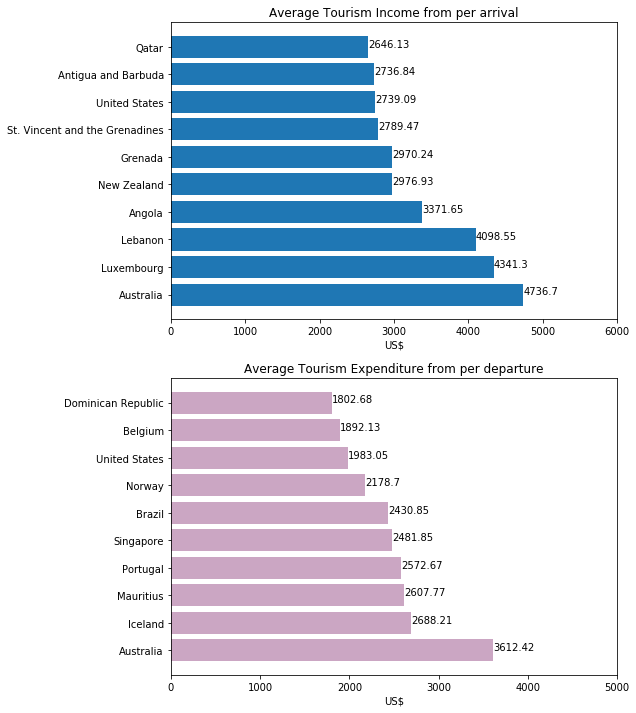

In [0]:
import matplotlib.pyplot as plt

# 计算该国平均每位入境游客的消费（美元）
df_income_ppl = df_dict['国际旅游收入'] / df_dict['国际旅游入境人数']
# 计算该国平均每位离境游客的消费（美元）
df_xpen_ppl = df_dict['国际旅游支出'] / df_dict['国际旅游离境人数']

fig = plt.figure(figsize = (8,12))
plt.subplot(2,1,1)
df_income_ppl_top10 = df_income_ppl[2017].sort_values(ascending=False).iloc[:10]
plt.barh(df_income_ppl_top10.index, df_income_ppl_top10)
plt.xlim(0, 6000)
plt.title('Average Tourism Income from per arrival')
plt.xlabel('US$')
for i, v in enumerate(df_income_ppl_top10):
    plt.text(v + 3, i + 0.0, str(round(v,2)), color='black')

plt.subplot(2,1,2)
df_xpen_ppl_top10 = df_xpen_ppl[2017].sort_values(ascending=False).iloc[:10]
plt.barh(df_xpen_ppl_top10.index, df_xpen_ppl_top10, color='#CBA6C3')
plt.xlim(0, 5000)
plt.title('Average Tourism Expenditure from per departure')
plt.xlabel('US$')
for i, v in enumerate(df_xpen_ppl_top10):
    plt.text(v + 3, i + 0.0, str(round(v,2)), color='black')
df_xpen_ppl_top10.head()

### 旅游收入（占总出口的百分比）和旅游支出（占总进口的百分比）国家排行

我们不仅可以通过净收入得到关于各国旅游业外汇的值，还能通过本国旅游收入（占总出口的百分比）和旅游支出（占总进口的百分比）与本国其他行业的收入和支出进行对比。下图给出2017年各国旅游收入（占总出口的百分比）和旅游支出（占总进口的百分比）世界排行前十的国家。

In [0]:
# 排除非国家 & 降序排序
df_income_percent = df_dict['国际旅游收入(百分比)'][2017].loc[[i for i in df_net.index if i not in orga.index]].sort_values(ascending=False)[:10]
df_expend_percent = df_dict['国际旅游支出(百分比)'][2017].loc[[i for i in df_net.index if i not in orga.index]].sort_values(ascending=False)[:10]

[(0.2298057, 0.298717966, 0.753683153, 1.0), (0.34832334141176474, 0.4657111465098039, 0.8883461629411764, 1.0), (0.48385432959999997, 0.6220498496, 0.9748082026, 1.0), (0.6193179451882354, 0.7441207347647059, 0.9989309188196078, 1.0), (0.753610618, 0.830232851, 0.960871157, 1.0), (0.8674276350862745, 0.864376599772549, 0.8626024620196079, 1.0), (0.9473454036, 0.7946955048, 0.7169905058, 1.0), (0.9684997476666667, 0.673977379772549, 0.5566492560470588, 1.0), (0.9318312966, 0.5190855232, 0.4064796086, 1.0), (0.8393649370784314, 0.32185622094117644, 0.26492398098039216, 1.0)]
[(0.2298057, 0.298717966, 0.753683153, 1.0), (0.34832334141176474, 0.4657111465098039, 0.8883461629411764, 1.0), (0.48385432959999997, 0.6220498496, 0.9748082026, 1.0), (0.6193179451882354, 0.7441207347647059, 0.9989309188196078, 1.0), (0.753610618, 0.830232851, 0.960871157, 1.0), (0.8674276350862745, 0.864376599772549, 0.8626024620196079, 1.0), (0.9473454036, 0.7946955048, 0.7169905058, 1.0), (0.9684997476666667, 0

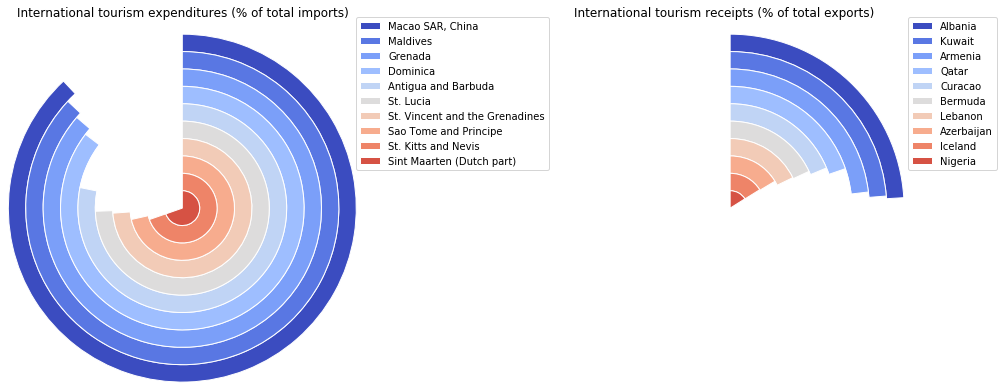

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

to_draw = [df_income_percent, df_expend_percent]

fig,ax = plt.subplots(1,2,figsize = (18,4))
for a, df in enumerate(to_draw):

  labels = to_draw[a].index
  data = to_draw[a]
  
  # 环数为top国家数
  n = len(data)
  # 完整一圈的值为100%
  m = 100
  # 最大半径为2
  r = 2
  # 每一环的宽度为半径/环数
  w = r / n 
  #设置每一环的不同颜色
  colors = [cm.coolwarm(i / n) for i in range(n)]
  
  for i in range(n):
      # 每一环的左半圈设置label为空
      innerring, _ = ax[a].pie([m - data[i], data[i]], radius = r - i * w, 
                             startangle = 90, labels = ["", labels[i]], 
                             labeldistance = 1 - 1 / (1.5 * (n - i)),
                            # 每一环的左半圈设置为透明
                             textprops = {"alpha": 0}, colors = ["None", colors[i]])
      plt.setp(innerring, width = w, edgecolor = "white")

ax[0].text(-1.9,2.2,'International tourism expenditures (% of total imports)',fontsize=12) 
ax[1].text(-1.8,2.2,'International tourism receipts (% of total exports)', fontsize=12) 
ax[0].legend( loc='upper right', bbox_to_anchor=(2.21, 1.4))
ax[1].legend( loc='upper right', bbox_to_anchor=(1.75, 1.4))

## 长期趋势

###中、美、西班牙历年指数变化

说到1995年到2017年的时间序列，首先最先想到的一定是各国指标随时间变化的折线图。下图通过折线图对比了中，美，西班牙1995年到2017年国际旅游离境人数，国际旅游入境人数，国际旅游收入和国际旅游支出的变化图。

左侧的图为三个国家国际旅游离境人数，国际旅游入境人数的趋势变化图，可以通过两条折线的面积之差对比当年该国旅游离境人数和入境人数。中国在2017年的离境旅游人数是远远超过入境人数的。右侧的图为三个国家国际旅游收入和国际旅游支出的趋势变化图，同理两条折线的面积之差为就是前面计算的净收入的趋势变化。

挑选的这三个国家各有差异：中国近年的离境旅客数和支出都分别远超入境旅客数和收入，而美国虽然离境旅客人数更多，但近年收入却大于支出，西班牙则跟中国的情况完全相反，入境旅客数和收入都分别大于离境旅客数和支出。

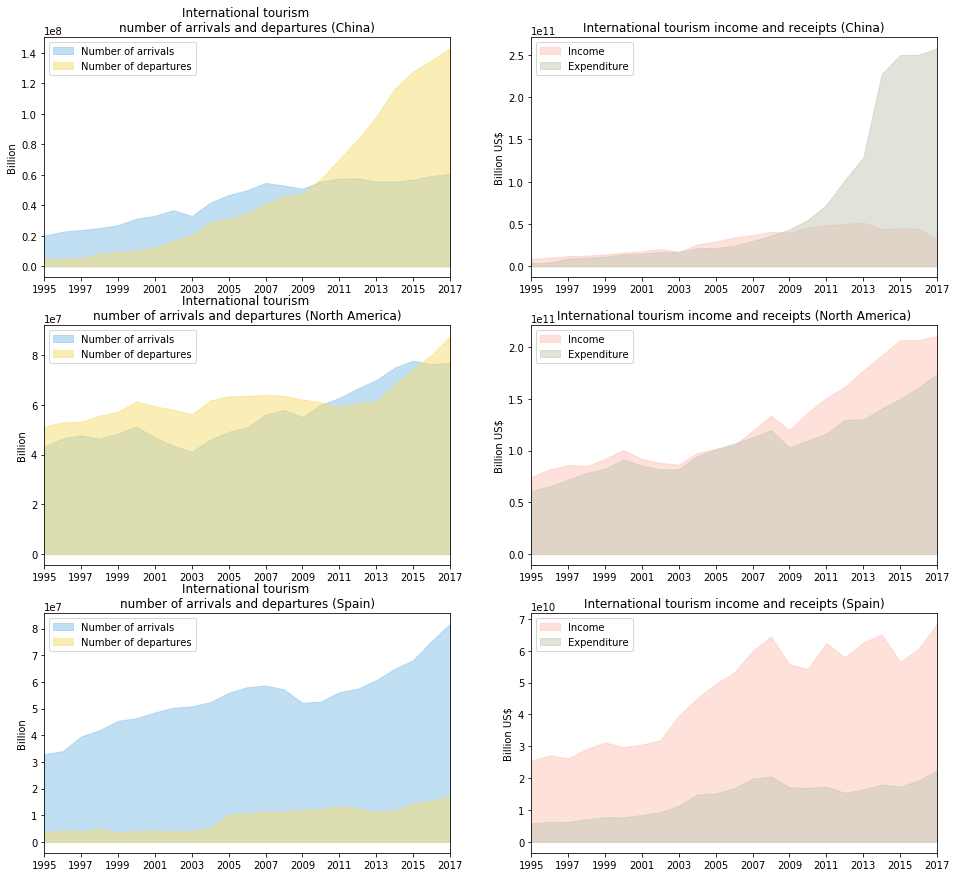

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

fig = plt.figure(figsize = (16,15))
plt.subplot(3,2,1)
plt.fill_between(df_dict['国际旅游入境人数'].columns, df_dict['国际旅游入境人数'].loc['China'], color='#85C1E9',
                 alpha=0.5, label='Number of arrivals')
plt.fill_between(df_dict['国际旅游离境人数'].columns, df_dict['国际旅游离境人数'].loc['China'], color='#F7DC6F',
                 alpha=0.5, label='Number of departures')
plt.xlim(1995,2017)
plt.title('International tourism \nnumber of arrivals and departures (China)')
plt.ylabel('Billion')
plt.xticks(range(2017,1994,-2))
plt.legend(loc='upper left')

plt.subplot(3,2,3)
plt.fill_between(df_dict['国际旅游入境人数'].columns, df_dict['国际旅游入境人数'].loc['United States'], color='#85C1E9',
                 alpha=0.5, label='Number of arrivals')
plt.fill_between(df_dict['国际旅游离境人数'].columns, df_dict['国际旅游离境人数'].loc['United States'], color='#F7DC6F',
                 alpha=0.5, label='Number of departures')
plt.xlim(1995,2017)
plt.title('International tourism \nnumber of arrivals and departures (North America)')
plt.ylabel('Billion')
plt.xticks(range(2017,1994,-2))
plt.legend(loc='upper left')

plt.subplot(3,2,2)
plt.fill_between(df_dict['国际旅游收入'].columns, df_dict['国际旅游收入'].loc['China'], color='#fdc4b6',
                 alpha=0.5, label='Income')
plt.fill_between(df_dict['国际旅游支出'].columns, df_dict['国际旅游支出'].loc['China'], color='#C5C6B6',
                 alpha=0.5, label='Expenditure')
plt.xlim(1995,2017)
plt.title('International tourism income and receipts (China)')
plt.ylabel('Billion US$')
plt.xticks(range(2017,1994,-2))
plt.legend(loc='upper left')

plt.subplot(3,2,4)
plt.fill_between(df_dict['国际旅游收入'].columns, df_dict['国际旅游收入'].loc['United States'], color='#fdc4b6',
                 alpha=0.5, label='Income')
plt.fill_between(df_dict['国际旅游支出'].columns, df_dict['国际旅游支出'].loc['United States'], color='#C5C6B6',
                 alpha=0.5, label='Expenditure')
plt.xlim(1995,2017)
plt.title('International tourism income and receipts (North America)')
plt.ylabel('Billion US$')
plt.xticks(range(2017,1994,-2))
plt.legend(loc='upper left')

plt.subplot(3,2,5)
plt.fill_between(df_dict['国际旅游入境人数'].columns, df_dict['国际旅游入境人数'].loc['Spain'], color='#85C1E9',
                 alpha=0.5, label='Number of arrivals')
plt.fill_between(df_dict['国际旅游离境人数'].columns, df_dict['国际旅游离境人数'].loc['Spain'], color='#F7DC6F',
                 alpha=0.5, label='Number of departures')
plt.xlim(1995,2017)
plt.title('International tourism \nnumber of arrivals and departures (Spain)')
plt.ylabel('Billion')
plt.xticks(range(2017,1994,-2))
plt.legend(loc='upper left')

plt.subplot(3,2,6)
plt.fill_between(df_dict['国际旅游收入'].columns, df_dict['国际旅游收入'].loc['Spain'], color='#fdc4b6',
                 alpha=0.5, label='Income')
plt.fill_between(df_dict['国际旅游支出'].columns, df_dict['国际旅游支出'].loc['Spain'], color='#C5C6B6',
                 alpha=0.5, label='Expenditure')
plt.xlim(1995,2017)
plt.title('International tourism income and receipts (Spain)')
plt.ylabel('Billion US$')
plt.xticks(range(2017,1994,-2))
plt.legend(loc='upper left')

### 中国的人数，收入，购买力的增长率 随时间变化的折线图

同时我们还可以查看中国历年的旅游收入，支出和游客的人数和消费能力增长率的历年变化趋势。增长率的计算公式为：
> 增长率（%） = （现年的某个指标的值-上年这个指标的值）/上年这个指标的值 * 100

In [0]:
# df_dollar_rate_in = df_dict['国际旅游收入'].loc[[i for i in df_net.index if i not in orga.index]]

# df_dollar_rate_in = (df_dict['国际旅游收入'].shift(periods=1, axis='columns') - df_dict['国际旅游收入']) / df_dict['国际旅游收入'] * 100

# df_dollar_rate_in

([<matplotlib.axis.XTick at 0x7f6d225b9b38>,
 <a list of 12 Text xticklabel objects>)

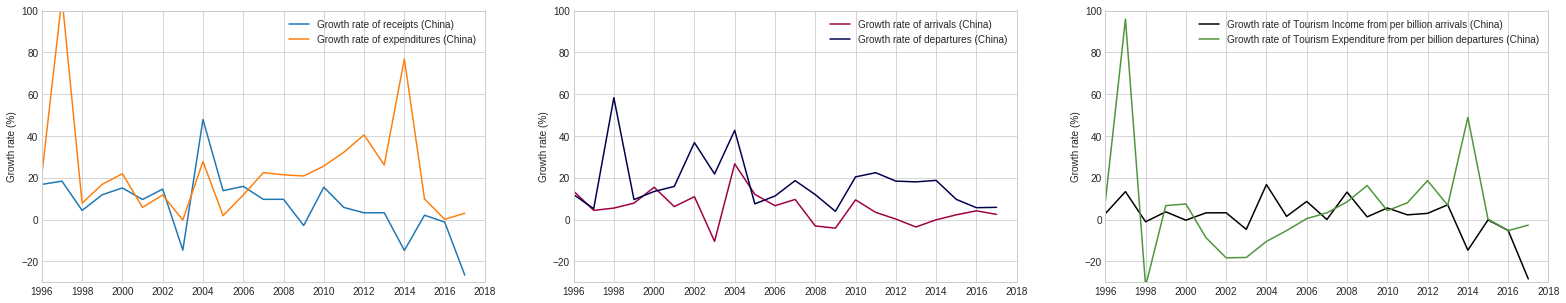

In [0]:
# 计算国际旅游收入的历年增长率
df_dollar_rate_in = (df_dict['国际旅游收入'].shift(periods=1, axis='columns') - df_dict['国际旅游收入']) / df_dict['国际旅游收入'] * 100
df_dollar_rate_in.columns = range(2018,1995,-1)
# 计算国际旅游支出的历年增长率
df_dollar_rate_out = (df_dict['国际旅游支出'].shift(periods=1, axis='columns') - df_dict['国际旅游支出']) / df_dict['国际旅游支出'] * 100
df_dollar_rate_out.columns = range(2018,1995,-1)
# 计算国际旅游入境人数的历年增长率
df_ppl_rate_in = (df_dict['国际旅游入境人数'].shift(periods=1, axis='columns') - df_dict['国际旅游入境人数']) / df_dict['国际旅游入境人数']* 100
df_ppl_rate_in.columns = range(2018,1995,-1)
# 计算国际旅游离境人数的历年增长率
df_ppl_rate_out = (df_dict['国际旅游离境人数'].shift(periods=1, axis='columns') - df_dict['国际旅游离境人数']) / df_dict['国际旅游离境人数'] * 100
df_ppl_rate_out.columns = range(2018,1995,-1)
# 计算平均每位入境游客消费的历年增长率
df_income_ppl_rate =  (df_income_ppl.shift(periods=1, axis='columns') - df_income_ppl) / df_income_ppl * 100
df_income_ppl_rate.columns = range(2018,1995,-1)
# 计算平均每位离境游客消费的历年增长率
df_xpen_ppl_rate =  (df_xpen_ppl.shift(periods=1, axis='columns') - df_xpen_ppl) / df_xpen_ppl * 100
df_xpen_ppl_rate.columns = range(2018,1995,-1)

#画出折线图
fig = plt.figure(figsize=(27,5))
plt.style.use('seaborn-whitegrid')
plt.subplot(1,3,1)
df_dollar_rate_in.loc['China'].plot(label='Growth rate of receipts (China)')
df_dollar_rate_out.loc['China'].plot(label='Growth rate of expenditures (China)')
plt.ylabel('Growth rate (%)')
plt.ylim(top=100, bottom=-30)
plt.xticks(range(2018,1995,-2))
plt.legend()

plt.subplot(1,3,2)
df_ppl_rate_in.loc['China'].plot(colormap='Spectral',label='Growth rate of arrivals (China)')
df_ppl_rate_out.loc['China'].plot(colormap='seismic',label='Growth rate of departures (China)')
plt.legend()
plt.xticks(range(2018,1995,-2))
plt.ylabel('Growth rate (%)')
plt.ylim(top=100, bottom=-30)

plt.subplot(1,3,3)
df_income_ppl_rate.loc['China'].plot(colormap='gray', label='Growth rate of Tourism Income from per billion arrivals (China)')
df_xpen_ppl_rate.loc['China'].plot(color='#4f953b', label='Growth rate of Tourism Expenditure from per billion departures (China)')
plt.ylim(top=100, bottom=-30)
plt.ylabel('Growth rate (%)')
plt.legend()
plt.xticks(range(2018,1995,-2))


# 数据预测

接下来尝试用ARIMA模型对中国的国际旅游入境人数进行初步预测。因为数据量比较少，只能取得1995年到2017年的国际旅游入境人数时间序列，所以准确率并不高。首先绘制中国的国际旅游入境人数时间序列的自相关图和LB统计量示意图。其中，ACF 图纵轴数值表示相关性，可以看出数值短期内没有收敛到零，所以该序列为非平稳时间序列。自然，LB统计量的 P 值也显著小于0.05.

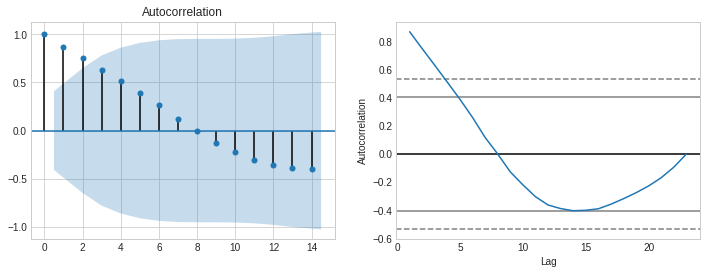

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.sandbox.stats.diagnostic import acorr_ljungbox
from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
df = df_dict['国际旅游入境人数']

# 将dataframe的index顺序调转为从1995年排到2017年
df = df.loc['China'].sort_index()

#绘制acf自相关图
plot_acf(df, ax=axes[0])
autocorrelation_plot(df, ax=axes[1])
# LB2, P2 = acorr_ljungbox(df)
# plt.plot(P2)

In [0]:
from statsmodels.tsa.stattools import arma_order_select_ic
import warnings


warnings.filterwarnings('ignore')

# 由于数据量较少只取出3个进行预测
train_data = df[:-3]  
test_data = df[-3:]
# 训练数据
arma_order_select_ic(train_data.diff().dropna(), ic=['aic', 'bic'], trend='nc')['aic_min_order']  

(1, 1)

In [0]:
train_data.head()

date
1995    20034000.0
1996    22765000.0
1997    23770000.0
1998    25073000.0
1999    27047000.0
Name: China, dtype: float64

In [0]:
from statsmodels.tsa.arima_model import ARIMA

# 训练模型
arima = ARIMA(train_data, order=(2, 1, 1)).fit() 

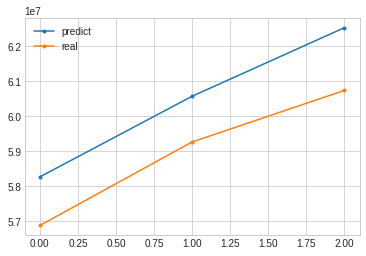

In [0]:
# 输出后续3个预测结果
plt.plot(arima.forecast(steps=3)[0], '.-', label="predict")  
plt.plot(test_data.values, '.-', label="real")
plt.legend()